In [1]:
import pandas as pd 
import numpy as np 
import sys
sys.path.append('../')

In [3]:
data = pd.read_csv('C:\Adarsh work\Dissonance\Data\client3.csv')


In [8]:
import pandas as pd
import numpy as np

def introduce_label_drift(data, min_samples=5, max_samples=2000):
    """
    Introduces label drift by changing the distribution of class frequencies.

    Parameters:
    - data: pandas DataFrame, the original data
    - min_samples: int, minimum number of samples per class (default: 5)
    - max_samples: int, maximum number of samples per class (default: 2000)

    Returns:
    - drifted_data: pandas DataFrame, the data with label drift
    """

    # Copy the original data to avoid modifying the original DataFrame
    drifted_data = data.copy()

    # Shuffle the samples randomly
    drifted_data = drifted_data.sample(frac=1, random_state=42).reset_index(drop=True)

    # Determine the number of classes dynamically
    num_classes = len(drifted_data['Fault'].unique())

    # Randomly generate the number of samples for each class
    class_sizes = np.random.randint(min_samples, max_samples + 1, num_classes)

    # Create a dictionary to map class labels to their new sizes
    new_class_sizes = dict(zip(drifted_data['Fault'].unique(), class_sizes))

    # Update the class sizes in the DataFrame
    drifted_data['Fault'] = drifted_data['Fault'].map(new_class_sizes)

    return drifted_data


drifted_data = introduce_label_drift(data)

In [9]:
drifted_data.head()

,AirIn,Air.T,Air.P,WaterIn,Water.T,Water.Density,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level,Fault
0,205.920197,18.820471,1.811300,0.488443,23.563730,991.045715,1.463883,1.162881,1.025986,1.451383e+01,1.080904,1.000355,30.026319,62.808521,98.666527,8.685666,1.426647,1147
1,119.251198,17.713659,1.242372,0.096595,23.500919,996.708923,1.280303,1.013152,1.017374,2.663070e-04,0.073828,0.996932,25.074200,62.009010,98.706902,2.086132,1.422017,1084
2,148.047806,16.080870,1.761979,0.496382,25.385830,996.182617,1.427648,1.111381,1.019348,6.352522e+00,0.981936,0.996302,27.332809,61.886330,98.602837,8.061992,1.440655,1933
3,120.042702,17.891621,1.225014,0.092763,23.336910,996.859497,1.285850,1.010290,1.021603,2.250000e-05,0.075578,0.999444,25.177670,62.001579,98.858498,2.470246,1.419776,1084
4,120.223900,17.808069,1.251812,0.094562,23.406700,996.788818,1.288473,1.032225,1.021723,1.460000e-07,0.063584,0.998931,25.182550,62.047951,98.760986,2.685479,1.419905,1084


In [10]:
np.unique(drifted_data['Fault'])

array([ 560, 1084, 1147, 1530, 1933])

In [18]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

def generate_skewed_distribution(csv_file_path, min_samples=10, max_samples=1000):
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)

    # Assuming the CSV file has a column named 'class' representing the class labels
    class_column = 'Fault'

    # Count the number of classes and their occurrences
    class_counts = df[class_column].value_counts()

    # Generate a random number of samples for each class within the specified range
    skewed_counts = {
        class_label: np.random.randint(min_samples, max_samples + 1)
        for class_label in class_counts.index
    }

    # Initialize an empty DataFrame to store the skewed distribution
    skewed_df = pd.DataFrame(columns=df.columns)

    # Generate the skewed distribution
    for class_label, count in skewed_counts.items():
        # Filter rows with the current class label
        class_rows = df[df[class_column] == class_label]

        # Randomly sample rows with replacement to achieve the desired count
        sampled_rows = class_rows.sample(count, replace=True)

        # Concatenate the sampled rows to the skewed DataFrame
        skewed_df = pd.concat([skewed_df, sampled_rows])

    return skewed_df

# Example usage:
# Replace 'your_file.csv' with the actual file path
skewed_data = generate_skewed_distribution('C:\Adarsh work\Dissonance\Data\client3.csv', min_samples=10, max_samples=1000)


In [19]:
skewed_data.head()

,AirIn,Air.T,Air.P,WaterIn,Water.T,Water.Density,Mixture.zone.P,riser.outlet.P,P.topsep,FR.topsep.gas,FR.topsep.liquid,P_3phase,Air.Valve,Water.level,Water.coalescer,Water.level.valve,water.tank.level,Fault
1497,118.776703,16.296671,1.848486,0.100221,23.343889,997.834717,1.208015,1.020066,1.025318,0.018410,0.072213,1.002420,25.294201,62.097290,98.751038,1.915424,1.447433,0.0
1097,122.212402,15.728350,1.299787,0.099559,23.448570,997.716614,1.225244,1.026742,1.019946,0.000109,0.083093,0.999138,24.897110,62.163601,98.647827,3.360496,1.445514,0.0
657,148.720200,16.002630,1.756519,0.496188,25.385830,996.151672,1.458419,1.149529,1.027175,6.108880,0.762894,1.001948,27.500771,62.031261,98.626778,8.220104,1.442606,0.0
406,120.767502,15.624480,1.283824,0.099205,23.570021,997.653503,1.220954,1.022688,1.026856,0.000603,0.085945,1.005147,25.093269,61.757420,98.638390,2.443465,1.444160,0.0
1689,148.715393,15.967700,1.709422,0.497980,26.297230,993.399414,1.504638,1.136177,1.021824,7.189635,0.813373,1.001471,27.066120,61.993111,98.619530,9.403731,1.440661,0.0


In [20]:
np.unique(skewed_data["Fault"])

array([0., 1., 2., 3., 4.])

In [21]:
skewed_data['Fault'].value_counts()

3.0    717
1.0    506
2.0    468
0.0    372
4.0    183
Name: Fault, dtype: int64

In [15]:
skewed_data.shape

(20000, 18)

In [37]:
print(1/(1+np.exp(-1)))

0.7310585786300049


In [3]:
def dtoa(d):
    a = 1 - ((d**2)/2)
    return a

d = 7.023
a = dtoa(d)
print(a)

-23.661264499999998


In [3]:
line = f'def start_client{1}(alg):\n\tif alg == "CDA-FedAvg":\n\t\tcdafedvg()\n\telif alg =="Feddrift"\n\t\tfeddrift()\n\telif alg=="Dissonance"\n\t\tpass'
print(line)

def start_client1(alg):
	if alg == "CDA-FedAvg":
		cdafedvg()
	elif alg =="Feddrift"
		feddrift()
	elif alg=="Dissonance"
		pass


In [1]:
import json
# Construct current_cluster as a dictionary
current_cluster_dict = {1: [1, 2]}
# Convert it to a string to pass as a command-line argument
current_cluster_str = json.dumps(current_cluster_dict)

In [3]:
print(f'Initial dict: {current_cluster_dict}')
print(f'Modified dict: {current_cluster_str}')

Initial dict: {1: [1, 2]}
Modified dict: {"1": [1, 2]}


In [9]:
level1 = ['{1: [1, 2]}']
type(level1)

list

In [8]:
import ast

level1 = ['{1: [1, 2]}']

# Extracting the string from the list
string_representation = level1[0]

# Using ast.literal_eval to safely evaluate the string as a dictionary
result_dict = ast.literal_eval(string_representation)

print(result_dict)

{1: [1, 2]}


In [9]:
print(result_dict.items())

dict_items([(1, [1, 2])])


In [23]:
dict1 = {1: [1, 2]}
dict2 = {1: [1, 2, 3]}

if dict1 != dict2:
    print("Vanakam da mapla")
else:
    print("Varataaaaaa")

Vanakam da mapla


In [24]:


def get_updated_clusters_from_server():
    # Load JSON file
    file_path = 'C:\Adarsh work\Dissonance\Results\Clusters\current_cluster_round3.json'
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Convert keys from strings to integers
    converted_cluster = {int(key): value for key, value in data.items()}

    return converted_cluster

cluster = get_updated_clusters_from_server()
print(cluster)

{1: [1, 5], 2: [2, 3, 4]}


In [2]:
sample_list = ['Server']

NUM_CLIENTS = 10
for i in range(1, NUM_CLIENTS + 1):
    name = f'Client{i}'
    sample_list.append(name)

print(sample_list)

['Server', 'Client1', 'Client2', 'Client3', 'Client4', 'Client5', 'Client6', 'Client7', 'Client8', 'Client9', 'Client10']


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

def evaluate_base_model_and_plot_stacked_bar_chart(client_id, X_test, Y_test):
  """
  Loads a TensorFlow model, evaluates it on class-wise data, and plots a stacked bar graph.

  Args:
    model_path: Path to the saved TensorFlow model.
    X_test: The test data features.
    Y_test: The test data labels.

  Returns:
    None. Plots the stacked bar graph.
  """

  # Load the model
  model_path = f"C:\Adarsh work\Dissonance\Results\client{client_id}\\base_model.h5"
  model = tf.keras.models.load_model(model_path)

  # Evaluate the model
  predictions = model.predict(X_test)
  predicted_classes = tf.argmax(predictions, axis=1)
  loss, accuracy = model.evaluate(X_test, Y_test)

  # Calculate class-wise metrics
  num_classes = len(tf.unique(Y_test).numpy())
  class_counts = tf.zeros(num_classes, dtype=tf.int32)
  correct_predictions = tf.zeros(num_classes, dtype=tf.int32)
  for i in range(len(Y_test)):
    class_counts[Y_test[i]] += 1
    correct_predictions[predicted_classes[i]] += int(predicted_classes[i] == Y_test[i])

  # Prepare data for the bar graph
  class_labels = tf.unique(Y_test).numpy()
  total_samples = class_counts.numpy()
  correct_samples = correct_predictions.numpy()
  incorrect_samples = total_samples - correct_samples

  # Create the stacked bar graph
  plt.figure(figsize=(10, 6))
  bar_width = 0.35
  x = range(len(class_labels))
  plt.bar(x, correct_samples, bar_width, label='Correct Predictions', color='green')
  plt.bar([i + bar_width for i in x], incorrect_samples, bar_width, label='Incorrect Predictions', color='red')
  plt.xlabel('Class Label')
  plt.ylabel('Number of Samples')
  plt.title('Class-Wise Performance of TensorFlow Model')
  plt.xticks([i + bar_width / 2 for i in x], class_labels)
  plt.legend()
  plt.tight_layout()
  plt.show()


In [5]:
import numpy as np

a = np.array([[1,1,1],[2,3,4],[5,6,5]])

# Count the number of occurrences of each unique item
unique, counts = np.unique(a, return_counts=True)

# The number of unique items is the length of the unique array
number_of_unique_items = len(unique)

print(number_of_unique_items) 
print(counts)

6
[3 1 1 1 2 1]


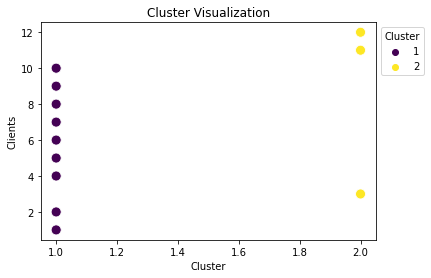

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def visualize_clusters(json_data):
    data = []
    for cluster, clients in json_data.items():
        data.extend([(int(cluster), client) for client in clients])

    df = pd.DataFrame(data, columns=['Cluster', 'Client'])
    sns.scatterplot(x='Cluster', y='Client', data=df, hue='Cluster', palette='viridis', s=100)
    
    plt.xlabel('Cluster')
    plt.ylabel('Clients')
    plt.title('Cluster Visualization')
    plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
    plt.show()

# Example usage:
json_data = {"1": [1, 2, 4, 5, 6, 7, 8, 9, 10], "2":[ 3,11,12]}
visualize_clusters(json_data)


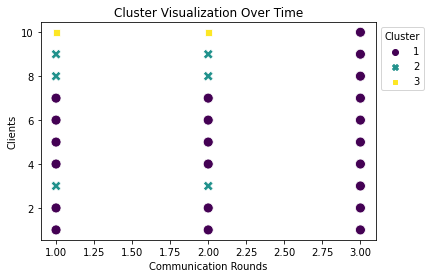

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

def visualize_clusters_over_time(json_files):
    data = []

    for time_point, json_file in enumerate(json_files, start=1):
        with open(json_file, 'r') as f:
            json_data = json.load(f)
        
        for cluster, clients in json_data.items():
            data.extend([(time_point, int(cluster), client) for client in clients])

    df = pd.DataFrame(data, columns=['Time', 'Cluster', 'Client'])
    sns.scatterplot(x='Time', y='Client', data=df, hue='Cluster', palette='viridis', s=100, style='Cluster', markers=True, legend='full')
    
    plt.xlabel('Communication Rounds')
    plt.ylabel('Clients')
    plt.title('Cluster Visualization Over Time')
    plt.legend(title='Cluster', bbox_to_anchor=(1, 1))
    plt.show()

# Example usage with multiple JSON files:
json_files = ["C:\Adarsh work\Dissonance\Results\Clusters\current_cluster_round1.json", "C:\Adarsh work\Dissonance\Results\Clusters\current_cluster_round2.json", "C:\Adarsh work\Dissonance\Results\Clusters\current_cluster_round3.json"]
visualize_clusters_over_time(json_files)


In [35]:
import sys
sys.path.append('../')

from Scripts.Custom_Scripts.constants import BASE_PATH

from keras.models import load_model
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
import time

def create_cohorts(NUM_COHORTS, input_list):
    """
    Create cohorts from the input list by dividing it into equal-sized groups.

    Parameters:
    - NUM_COHORTS (int): Number of cohorts to create.
    - input_list (list): List of integers to be divided into cohorts.

    Returns:
    - dict: Dictionary representing cohorts with cohort number as keys and list of
            integers as values.

    Raises:
    - ValueError: If input validation fails (e.g., NUM_COHORTS is not a positive integer,
                  input is not a list, or input list contains non-integer elements).
    """

    if not isinstance(NUM_COHORTS, int) or NUM_COHORTS <= 0:
        raise ValueError("NUM_COHORTS must be a positive integer")

    if not isinstance(input_list, list):
        raise ValueError("Input must be a list")

    if not all(isinstance(x, int) for x in input_list):
        raise ValueError("All elements in the input list must be integers")

    # if len(input_list) % NUM_COHORTS != 0:
    #     raise ValueError("Length of input list must be divisible by NUM_COHORTS")

    cohort_size = len(input_list) // NUM_COHORTS
    cohorts = {}

    for i in range(NUM_COHORTS):
        start_idx = i * cohort_size
        end_idx = start_idx + cohort_size
        cohort_values = [j+1 for j, x in enumerate(input_list) if x == i]
        cohorts[i + 1] = cohort_values

    return cohorts

def get_weights(loaded_model):

    """
    Get the flattened weights of each layer from a loaded Keras model.

    Parameters:
    - loaded_model: Keras model object.

    Returns:
    - np.ndarray: Flattened weights of all layers concatenated.
    """

    # Get the weights of each layer
    model_weights = []
    for layer in loaded_model.layers:
        layer_weights = layer.get_weights()
        model_weights.extend([w.flatten() for w in layer_weights])

    # Concatenate all flattened weights
    model_weights_flat = np.concatenate(model_weights)
    return model_weights_flat

def get_cohorts(NUM_CLIENTS, drifted_clients = None):

    """
    Get cohorts of clients based on the weights of their loaded Keras models.

    Parameters:
    - NUM_CLIENTS (int): Number of clients participating in the federated learning.

    Returns:
    - dict: Dictionary representing cohorts with cohort number as keys and list of
            client IDs as values.

    Raises:
    - FileNotFoundError: If the model file is not found at the specified path.
    - OSError: If an operating system error occurs during model loading.
    """

    # Get Load model from each client and get their weights.
    weights_list = []
    if drifted_clients is None:
        for i in tqdm(range(1, NUM_CLIENTS+1)):
            model_path = BASE_PATH + f"Results\client{i}\\Models\\base_model.h5"
            while True:
                try:
                    model = load_model(model_path)
                    weights = get_weights(model)
                    weights_list.append(weights)
                    break  # If loading is successful, exit the loop
                except (FileNotFoundError, OSError) as e:
                    print(f"Error loading model at {model_path}: {e}. Waiting and retrying...")
                    time.sleep(10)  # Increased sleep duration to 10 seconds
    else:
        for i in tqdm(range(1, NUM_CLIENTS+1)):
            if i in drifted_clients:
                model_path = BASE_PATH + f"Results\client{i}\\Models\\client{i}_retrained_model.h5"
            else:
                model_path = BASE_PATH + f"Results\client{i}\\Models\\base_model.h5"
            while True:
                try:
                    model = load_model(model_path)
                    weights = get_weights(model)
                    weights_list.append(weights)
                    break  # If loading is successful, exit the loop
                except (FileNotFoundError, OSError) as e:
                    print(f"Error loading model at {model_path}: {e}. Waiting and retrying...")
                    time.sleep(10)  # Increased sleep duration to 10 seconds

    weights = np.array(weights_list)
    weights = np.array(weights_list)

    # PCA transformation
    pc = PCA(n_components=0.99, svd_solver='full')
    W_transformed = pc.fit_transform(weights)

    # Find optimal NUM_COHORTS using silhouette score
    best_score = -1
    best_num_cohorts = -1

    for num_cohorts in range(2, min(11, len(W_transformed))):  # Adjusted the range
        kmeans = KMeans(n_clusters=num_cohorts, init='k-means++', max_iter=300)
        kmeans.fit(W_transformed)
        labels = kmeans.labels_
        score = silhouette_score(W_transformed, labels)
        print(f'Cohort: {num_cohorts}: Silhouette_score: {score}')
        if score > best_score:
            best_score = score
            best_num_cohorts = num_cohorts

    # Use the best NUM_COHORTS
    kmeans = KMeans(n_clusters=best_num_cohorts, init='k-means++')
    kmeans.fit(W_transformed)
    cohorts = kmeans.labels_.tolist()  # Convert to list
    print(f'Best NUM_COHORTS: {best_num_cohorts}, Cohorts: {cohorts}')
    cohorts = create_cohorts(best_num_cohorts, cohorts)
    return cohorts

In [36]:
cohorts = get_cohorts(10)
print(cohorts)

100%|██████████| 10/10 [00:01<00:00,  5.69it/s]


Cohort: 2: Silhouette_score: 0.008145253174006939
Cohort: 3: Silhouette_score: 0.0036308385897427797
Cohort: 4: Silhouette_score: 0.004226010292768478
Cohort: 5: Silhouette_score: 0.00578697957098484
Cohort: 6: Silhouette_score: 0.006475445814430714
Cohort: 7: Silhouette_score: 0.005246030632406473
Cohort: 8: Silhouette_score: 0.0039091105572879314
Cohort: 9: Silhouette_score: 0.002022908767685294
Best NUM_COHORTS: 2, Cohorts: [1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
{1: [2, 3, 4, 6, 8, 10], 2: [1, 5, 7, 9]}


{1: [1, 2, 3, 4, 5], 2: [6, 7, 8, 9, 10]}


In [32]:
def get_indices(data_list, value):
  """
  Get the indices of a given value in a list.

  Args:
      data_list: The list to search.
      value: The value to search for.

  Returns:
      A list of indices where the value is found in the data_list.
  """

  return [i for i, x in enumerate(data_list) if x == value]

# Example usage
data_list = [0, 1, 0, 0, 1, 0]
value = 0
indices = get_indices(data_list, value)
print(indices)


[0, 2, 3, 5]


In [37]:
from scipy.stats import ks_2samp
import numpy as np 
np.random.seed(12345678)
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
z = np.random.normal(1.1, 0.9, 1000)

ks_2samp(x, y)

KstestResult(statistic=0.023, pvalue=0.9542189106778983, statistic_location=0.8972598220477659, statistic_sign=-1)

In [38]:
ks_2samp(x,z)

KstestResult(statistic=0.418, pvalue=1.2040448267583641e-78, statistic_location=0.38777076209579736, statistic_sign=1)

Kolmogorov-Smirnov statistic (D) between Data 1 and Data 2: 0.5200
p-value: 0.0000
Kolmogorov-Smirnov statistic (D) between Data 1 and Data 3: 0.2100
p-value: 0.0241


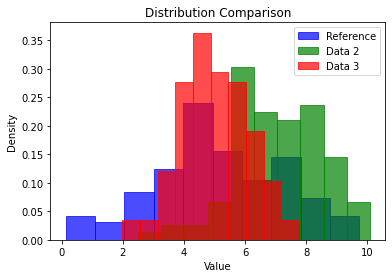

In [44]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def ks_2samp_test_and_plot(data1, data2, data3, title):
  """
  This function performs a two-sample Kolmogorov-Smirnov test between two datasets and plots the results.

  Args:
      data1 (list): The first dataset (reference).
      data2 (list): The second dataset.
      data3 (list): The third dataset.
      title (str): The title of the plot.

  Returns:
      tuple: A tuple containing the Kolmogorov-Smirnov statistic (D) for each comparison,
             corresponding p-values, and the figure object.
  """

  # Perform the two-sample Kolmogorov-Smirnov tests
  statistic1, pvalue1 = stats.ks_2samp(data1, data2)
  statistic2, pvalue2 = stats.ks_2samp(data1, data3)

  # Create the plot
  fig, ax = plt.subplots()
  counts1, bins1, patches1 = ax.hist(data1, density=True, label='Reference')
  counts2, bins2, patches2 = ax.hist(data2, density=True, label='Data 2')
  counts3, bins3, patches3 = ax.hist(data3, density=True, label='Data 3')
  plt.setp(patches1, alpha=0.7, color='b')
  plt.setp(patches2, alpha=0.7, color='g')
  plt.setp(patches3, alpha=0.7, color='r')
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.title(title)
  plt.legend()

  # Print the test results
  print(f"Kolmogorov-Smirnov statistic (D) between Data 1 and Data 2: {statistic1:.4f}")
  print(f"p-value: {pvalue1:.4f}")
  print(f"Kolmogorov-Smirnov statistic (D) between Data 1 and Data 3: {statistic2:.4f}")
  print(f"p-value: {pvalue2:.4f}")

  return statistic1, pvalue1, statistic2, pvalue2, fig


# Example usage
data1 = np.random.normal(loc=5, scale=2, size=100)
data2 = np.random.normal(loc=7, scale=1.5, size=100)
data3 = np.random.normal(loc=5, scale=1, size=100)

statistic1, pvalue1, statistic2, pvalue2, fig = ks_2samp_test_and_plot(data1, data2, data3, "Distribution Comparison")
plt.show()


DATA 1 - Kolmogorov-Smirnov statistic (D):0.6400 ; p-value: 0.0000 ; statistic-location: 5.748829935303144 ; statistic-sign: 1
DATA 2 - Kolmogorov-Smirnov statistic (D):0.1400 ; p-value: 0.2819 ; statistic-location: 4.305421540467155 ; statistic-sign: 1


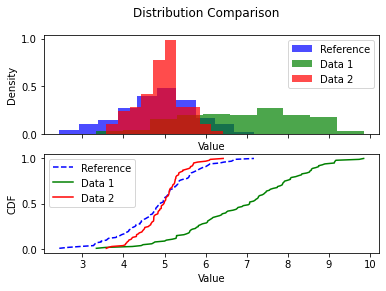

In [14]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def ks_2samp_test_and_plot(data_ref, data1, data2, title):
  """
  This function performs two-sample Kolmogorov-Smirnov tests between a reference dataset and two other datasets, and plots the results for visual comparison.

  Args:
      data_ref (list): The reference dataset.
      data1 (list): The first dataset to compare with the reference.
      data2 (list): The second dataset to compare with the reference.
      title (str): The title of the plot.

  Returns:
      tuple: A tuple containing three results, each a tuple with the Kolmogorov-Smirnov statistic (D) and p-value for the corresponding comparison.
  """

  # Sort data for CDF calculation
  data_ref = np.sort(data_ref)
  data1 = np.sort(data1)
  data2 = np.sort(data2)

  # Calculate CDFs
  cdf_ref = np.cumsum(np.ones_like(data_ref) / len(data_ref))
  cdf1 = np.cumsum(np.ones_like(data1) / len(data1))
  cdf2 = np.cumsum(np.ones_like(data2) / len(data2))

  # Create the plot
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
  ax1.hist(data_ref, density=True, label='Reference', alpha=0.7, color='b', linestyle='--')
  ax1.hist(data1, density=True, label='Data 1', alpha=0.7, color='g')
  ax1.hist(data2, density=True, label='Data 2', alpha=0.7, color='r')
  ax1.set_xlabel('Value')
  ax1.set_ylabel('Density')
  ax1.legend()

  ax2.plot(data_ref, cdf_ref, label='Reference', color='b', linestyle='--')
  ax2.plot(data1, cdf1, label='Data 1', color='g')
  ax2.plot(data2, cdf2, label='Data 2', color='r')
  ax2.set_xlabel('Value')
  ax2.set_ylabel('CDF')
  ax2.legend()
  plt.suptitle(title)

  # Perform the two-sample Kolmogorov-Smirnov tests
  result1 = stats.ks_2samp(data_ref, data1)
  result2 = stats.ks_2samp(data_ref, data2)

  # Print the test results
  print(f"DATA 1 - Kolmogorov-Smirnov statistic (D):{result1.statistic:.4f} ; p-value: {result1.pvalue:.4f} ; statistic-location: {result1.statistic_location} ; statistic-sign: {result1.statistic_sign}")
  print(f"DATA 2 - Kolmogorov-Smirnov statistic (D):{result2.statistic:.4f} ; p-value: {result2.pvalue:.4f} ; statistic-location: {result2.statistic_location} ; statistic-sign: {result2.statistic_sign}")

  return result1, result2


# Example usage
data_ref = np.random.normal(loc=5, scale=1, size=100)
data1 = np.random.normal(loc=7, scale=1.5, size=100)
data2 = np.random.normal(loc=5, scale=0.5, size=100)

results1, results2 = ks_2samp_test_and_plot(data_ref, data1, data2, "Distribution Comparison")
plt.show()


In [7]:
from scipy.stats import ks_2samp

data1 = [1, 2, 3, 4, 5]
data2 = [2, 3, 4, 5, 6]

result = ks_2samp(data1, data2)

statistic = result.statistic
pvalue = result.pvalue
statistic_location = result.statistic_location
statistic_sign = result.statistic_sign


C:\Users\inadnl\AppData\Local\Temp\ipykernel_14056\1272573574.py:6: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  result = ks_2samp(data1, data2)


In [7]:
import re
import json

file_path = r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance\Results\Drift\Json\drift_entry.json"

def find_clients(string):
    return re.findall(r'\d+', string)

with open(file_path, 'r') as file:
    json_data = json.load(file)
    
communication_round = json_data.get('communication_round')
print(f'communicaiton round: {communication_round}, type: {type(communication_round)}')
default_client_id = find_clients(json_data.get('client_id'))
print(f'default_client_id round: {default_client_id}, type: {type(default_client_id)}')
default_client_id = list(map(int, default_client_id))
print(f'default_client_id round: {default_client_id}, type: {type(default_client_id)}')
drift_type = json_data.get('drift_type')

communicaiton round: 3, type: <class 'int'>
default_client_id round: ['1', '2', '3', '4', '5'], type: <class 'list'>
default_client_id round: [1, 2, 3, 4, 5], type: <class 'list'>


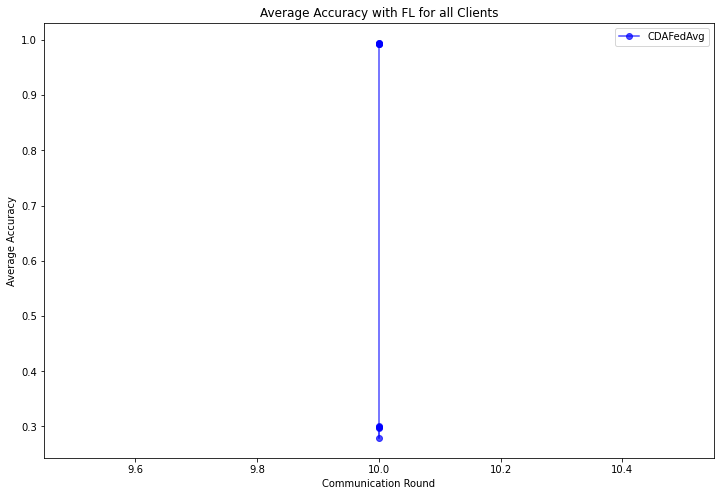

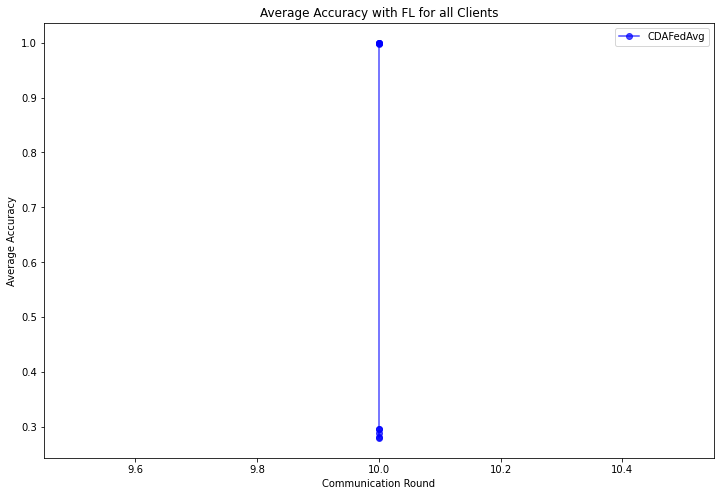

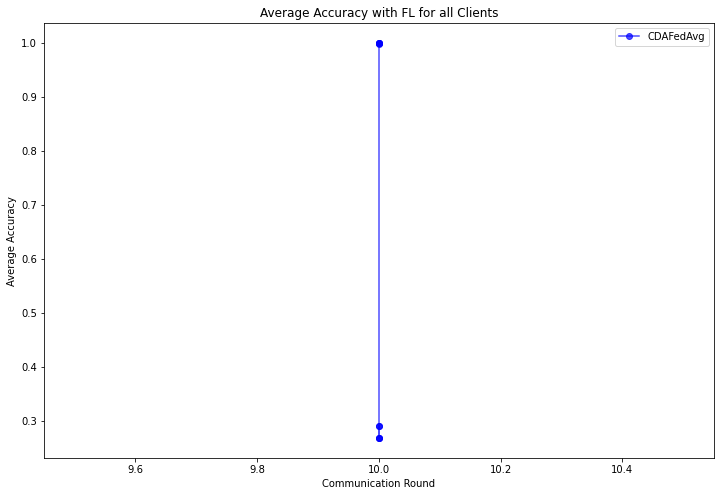

In [13]:
import os
import json
import matplotlib.pyplot as plt

BASE_PATH = r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance\Results"
NUM_CLIENTS = 10

def plot_accuracy_curve(file_name):
    """
    Plot the average accuracy curve for all clients' federated learning.

    Parameters:
    - file_name (str): Name of the JSON file containing accuracy data.

    Returns:
    None
    """
    
    # Initialize lists to store data
    avg_acc = []
    comm_rounds = []

    # Loop through each client to collect accuracy data
    for client_num in range(1, NUM_CLIENTS + 1):
        # Construct the full file path
        file_path = os.path.join(BASE_PATH, f'client{client_num}\\Json', file_name)

        try:
            # Check if the file exists
            if os.path.exists(file_path):
                # Read data from the JSON file
                with open(file_path, 'r') as file:
                    data_lines = file.readlines()

                # Extract communication rounds and corresponding accuracy
                client_acc = []

                for line in data_lines:
                    entry = json.loads(line)
                    client_acc.append(entry['accuracy'])

                # Add client accuracy to the list
                avg_acc.append(sum(client_acc) / len(client_acc))
                comm_rounds.append(entry['comm_round'])
            else:
                # Display a message if the file is not found
                #st.write(f"Unable to find {file_name} for client {client_num}.")
                print(f"Unable to find {file_name} for client {client_num}.")
        except Exception as e:
            print(f"Error reading {file_name} for client {client_num}: {e}")
            #st.write(f"Error reading {file_name} for client {client_num}: {e}")

    # Set colors for each algorithm
    colors = ['b', 'g', 'r']
    labels = ['CDAFedAvg', 'FedDrift', 'Dissonance']

    # Create a plot
    plt.figure(figsize=(12, 8))
    for i, file_name in enumerate([file_name]):
        plt.plot(comm_rounds, avg_acc, label=labels[i], color=colors[i], marker='o', linestyle='-', alpha=0.7)

    # Set plot title and labels
    plt.title('Average Accuracy with FL for all Clients')
    plt.xlabel('Communication Round')
    plt.ylabel('Average Accuracy')
    plt.legend()


# File names for each algorithm
file_names = ['CDAFedAvg_results.json', 'FedDrift_results.json', 'Dissonance_results.json']

for file_name in file_names:
    plot_accuracy_curve(file_name)


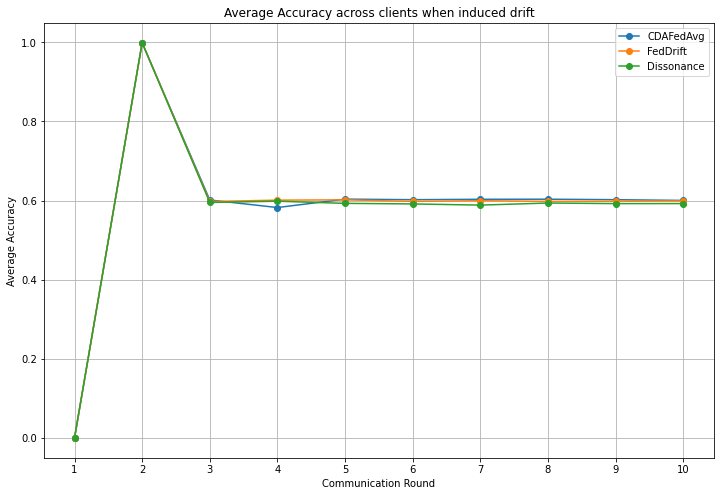

In [22]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance"
NUM_CLIENTS = 10

def plot_accuracy_curve(algorithm_names, file_names):
    """
    Plot the average accuracy curve for all clients across different algorithms.

    Parameters:
    - algorithm_names (list): List of algorithm names.
    - file_names (list): List of file names for the JSON files.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))

    max_comm_round = 0
    for algorithm_name, file_name in zip(algorithm_names, file_names):
        avg_accuracies = np.zeros(10)  # Assuming max 10 communication rounds
        counts = np.zeros(10)

        for client_num in range(1, NUM_CLIENTS + 1):
            file_path = os.path.join(BASE_PATH, f'Results\client{client_num}\\Json', file_name)

            if os.path.exists(file_path):
                with open(file_path, 'r') as file:
                    data_lines = file.readlines()

                for line in data_lines:
                    entry = json.loads(line)
                    comm_round = entry['comm_round']
                    accuracy = entry['accuracy']

                    if comm_round > max_comm_round:
                        max_comm_round = comm_round

                    avg_accuracies[comm_round - 1] += accuracy
                    counts[comm_round - 1] += 1

        avg_accuracies = np.divide(avg_accuracies, NUM_CLIENTS, where=counts != 0)  # Normalize by the number of clients

        # Create a plot
        plt.plot(np.arange(1, len(avg_accuracies) + 1), avg_accuracies, label=algorithm_name, marker='o', linestyle='-')

    # Set plot title and labels
    plt.title('Average Accuracy across clients when induced drift')
    plt.xlabel('Communication Round')
    plt.ylabel('Average Accuracy')
    plt.grid(True)
    plt.xticks(np.arange(1, max_comm_round + 1))
    plt.legend()
    
    # Display the plot
    plt.show()

# Define the algorithm names and file names 
algorithm_names = ['CDAFedAvg', 'FedDrift', 'Dissonance']
file_names = ['CDAFedAvg_results.json', 'FedDrift_results.json', 'Dissonance_results.json']

# Plot the accuracy curves
plot_accuracy_curve(algorithm_names, file_names)


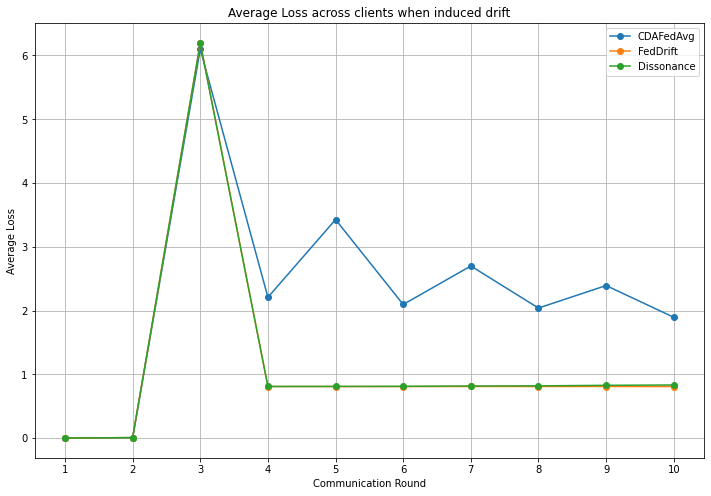

In [21]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = r"C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance"
NUM_CLIENTS = 10

def plot_metric_curve(metric_name, algorithm_names, file_names):
    """
    Plot the average metric curve (loss or accuracy) for all clients across different algorithms.

    Parameters:
    - metric_name (str): Name of the metric to plot ('loss' or 'accuracy').
    - algorithm_names (list): List of algorithm names.
    - file_names (list): List of file names for the JSON files.

    Returns:
    None
    """
    plt.figure(figsize=(12, 8))

    max_comm_round = 0
    for algorithm_name, file_name in zip(algorithm_names, file_names):
        avg_metrics = np.zeros(10)  # Assuming max 10 communication rounds
        counts = np.zeros(10)

        for client_num in range(1, NUM_CLIENTS + 1):
            file_path = os.path.join(BASE_PATH, f'Results\\client{client_num}\\Json', file_name)

            if os.path.exists(file_path):
                with open(file_path, 'r') as file:
                    data_lines = file.readlines()

                for line in data_lines:
                    entry = json.loads(line)
                    comm_round = entry['comm_round']
                    metric_value = entry[metric_name]

                    if comm_round > max_comm_round:
                        max_comm_round = comm_round

                    avg_metrics[comm_round - 1] += metric_value
                    counts[comm_round - 1] += 1

        avg_metrics = np.divide(avg_metrics, NUM_CLIENTS, where=counts != 0)  # Normalize by the number of clients

        # Create a plot
        plt.plot(np.arange(1, len(avg_metrics) + 1), avg_metrics, label=algorithm_name, marker='o', linestyle='-')

    # Set plot title and labels
    plt.title(f'Average {metric_name.capitalize()} across clients when induced drift')
    plt.xlabel('Communication Round')
    plt.ylabel(f'Average {metric_name.capitalize()}')
    plt.grid(True)
    plt.xticks(np.arange(1, max_comm_round + 1))
    plt.legend()
    
    # Display the plot
    plt.show()

# Define the algorithm names and file names
algorithm_names = ['CDAFedAvg', 'FedDrift', 'Dissonance']
file_names = ['CDAFedAvg_results.json', 'FedDrift_results.json', 'Dissonance_results.json']

# Plot the loss curves
plot_metric_curve('loss', algorithm_names, file_names)


(10, 10)


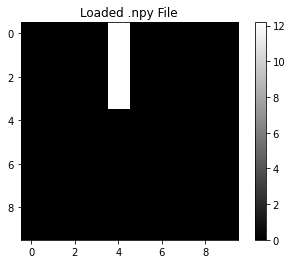

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the .npy file
data = np.load(r'C:\Users\inadnl\OneDrive - ABB\Adarsh work\Dissonance\Results\DistanceMetric\communication_round3_distancemetric.npy')

print(data.shape)
# Display the data
plt.imshow(data, cmap='gray')  # Assuming the data is an image, cmap can be changed accordingly
plt.colorbar()
plt.title('Loaded .npy File')
plt.show()


In [6]:
for row in data:
    for col in row:
        print(col)

0.0
0.0
0.00042005814611911774
0.0
12.173060992732644
0.0
0.0
0.0
0.0
0.0
0.010366218274612038
0.0
0.010786276420731156
4.022559824079508e-05
12.183427211007256
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
12.172640934586525
0.0
0.0
0.0
0.0
0.0
0.010325992676371243
0.0
0.01074605082249036
0.0
12.183386985409015
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
